## Amido de Mandioca

**Author**: Ivan Abreu

**Description**: Reconhecimento de grãos de araruta e mandioca através de análise de imagens microscópicas.

In [124]:
import sys
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color, measure
from scipy import ndimage
from skimage.segmentation import clear_border
import pandas as pd

Carrega uma imagem, e a transforma em escala de cinza.

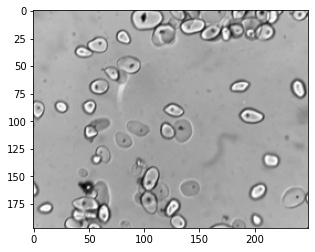

In [125]:
img = cv.imread("data/Araruta.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap=plt.cm.gray)
plt.show()

Com o atributo flat da imgread, temos **gray** com apenas uma dimensao.

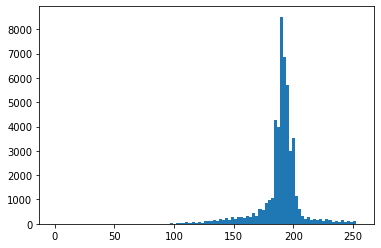

In [126]:
plt.hist(gray.flat, bins=100, range=(0, 255));

Agora criaremos um limiar utilizando uma funcao do OpenCV.

O limiar sera usado para criar uma imagem P&B.

In [127]:
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# pesquisar sobre algoritmo watershed para possivel melhores resultados

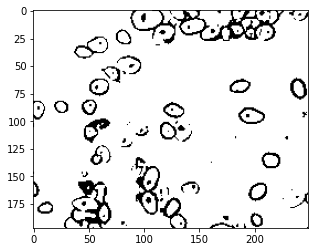

In [128]:
plt.imshow(thresh, cmap=plt.cm.gray)

# Removendo graos nas bordas

Podemos separar que existem diversos graos que estao contidos na borda da imagem, removeremos tais graos porque...

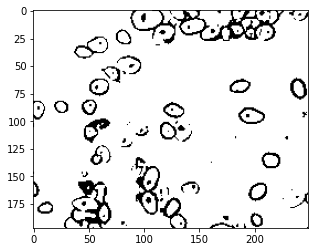

In [129]:
#thresh = clear_border(thresh)
#plt.imshow(thresh - clear, cmap=plt.cm.gray)
# revisar algoritmo, porque nao deu muito certo nao
"""
white = np.full((352, 468), 255, dtype=np.uint8)

thresh = white + clear
"""
plt.imshow(thresh, cmap=plt.cm.gray)

Podemos separar que a imagem possui diversos pontos, os quais, sao ruidos ge

In [130]:
kernel = np.ones((3, 3), np.uint8)
eroded = cv.erode(thresh, kernel, iterations=1)
dilated = cv.dilate(eroded, kernel, iterations=1)

Apesar de utilizar o thresh, ainda possuimos nossa imagem como um uint8. 

Podemos utilizar uma pequena expressao para transformar nosso valores **255** em True, e os valores **0** em False.

Dessa forma, teremos uma array contendo o valor individual de cada pixel em True ou False.

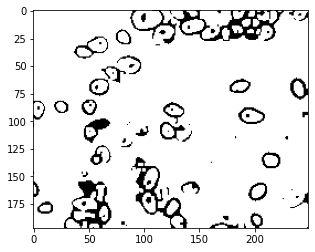

In [131]:
mask = dilated == 255
plt.imshow(mask, cmap=plt.cm.gray);

Label, 8 connectivity

In [132]:
s = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
labeled_mask, num_of_labels = ndimage.label(mask)

In [133]:
img2 = color.label2rgb(labeled_mask, bg_label=1, bg_color=(1, 1, 1))

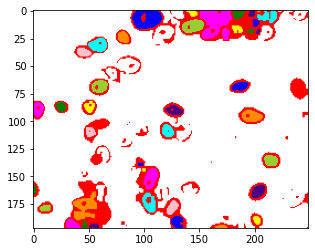

In [134]:
plt.imshow(img2);

In [135]:
grains = measure.regionprops(labeled_mask, gray)

In [138]:
data = [(g.label, g.area) for g in grains]
df = pd.DataFrame(data, columns=['label', 'area'])

# A area maior corresponde ao espaço em branco
df

,label,area
0,1,39874
1,2,350
2,3,43
3,4,477
4,5,67
